## Retorno Simples

$$
\frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} - 1
$$

In [57]:
import numpy as np
from pandas_datareader import data as wb
import pandas as pd
import matplotlib.pyplot as plt


In [58]:
MSFT = wb.DataReader('msft', data_source='yahoo', start='2020-1-1')

In [59]:
MSFT.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,160.729996,158.330002,158.779999,160.619995,22622100.0,157.615097
2020-01-03,159.949997,158.059998,158.320007,158.619995,21116200.0,155.652527
2020-01-06,159.100006,156.509995,157.080002,159.029999,20813700.0,156.054855
2020-01-07,159.669998,157.320007,159.320007,157.580002,21634100.0,154.631989
2020-01-08,160.800003,157.949997,158.929993,160.089996,27746500.0,157.095016


Calcule o retorno médio diário.

In [5]:
MSFT['simple_return'] = (MSFT['Adj Close'] / MSFT['Adj Close'].shift(1)) - 1
print (MSFT['simple_return'])

Date
2020-01-02         NaN
2020-01-03   -0.012452
2020-01-06    0.002585
2020-01-07   -0.009118
2020-01-08    0.015928
                ...   
2022-02-04    0.015568
2022-02-07   -0.016310
2022-02-08    0.011995
2022-02-09    0.021835
2022-02-10   -0.028373
Name: simple_return, Length: 533, dtype: float64


<AxesSubplot:xlabel='Date'>

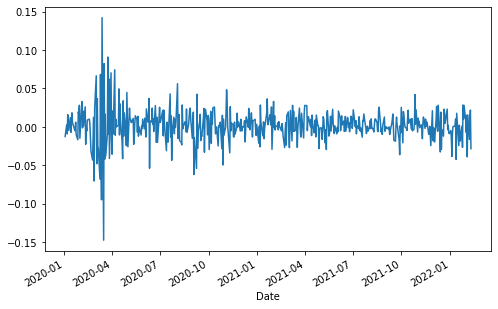

In [6]:
MSFT['simple_return'].plot(figsize=(8,5))

In [7]:
retorno_medio_d = MSFT['simple_return'].mean()

In [8]:
retorno_medio_d

0.0014591679320252976

In [9]:
retorno_medio_a = MSFT['simple_return'].mean() * 250

In [10]:
retorno_medio_a

0.36479198300632437

In [23]:
print (str(round(retorno_medio_a,2)*100)+'%')

36.0%


## Retorno Logarítmico

$$
ln(\frac{P_t}{P_{t}})
$$

In [24]:
MSFT['log_return'] = np.log(MSFT['Adj Close'] / MSFT['Adj Close'].shift(1))
print (MSFT['log_return'])

Date
2020-01-02         NaN
2020-01-03   -0.012530
2020-01-06    0.002582
2020-01-07   -0.009160
2020-01-08    0.015803
                ...   
2022-02-04    0.015449
2022-02-07   -0.016445
2022-02-08    0.011924
2022-02-09    0.021600
2022-02-10   -0.028783
Name: log_return, Length: 533, dtype: float64


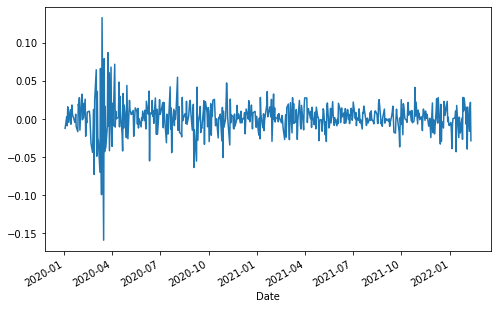

In [25]:
MSFT['log_return'].plot(figsize=(8, 5))
plt.show()

<AxesSubplot:xlabel='Date'>

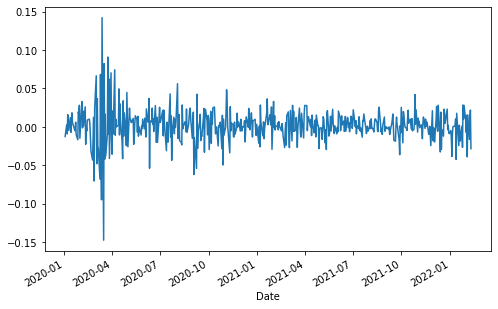

In [26]:
MSFT['simple_return'].plot(figsize=(8,5))

In [27]:
log_return_d = MSFT['log_return'].mean()
log_return_d

0.0012246775519083035

In [28]:
retorno_medio_d

0.0014591679320252976

In [29]:
log_return_a = MSFT['log_return'].mean() * 250
log_return_a

0.3061693879770759

In [45]:
print ('Retorno Logarítmico '+str(round(log_return_a, 3) * 100) + ' %')

Retorno Logarítmico 30.599999999999998 %


In [44]:
print ('Retorno Simples '+str(round(retorno_medio_a,3)*100)+'%')

Retorno Simples 36.5%


## Retorno Portfolio

In [32]:
tickers = ['PETR4.SA', 'VALE3.SA', 'BBDC4.SA', 'USIM5.SA', 'GGBR4.SA']
meusdados = pd.DataFrame()
for t in tickers:
    meusdados[t] = wb.DataReader(t, data_source='yahoo', start='2020-1-1')['Adj Close']

In [33]:
meusdados.head()

,PETR4.SA,VALE3.SA,BBDC4.SA,USIM5.SA,GGBR4.SA
Date,,,,,
2020-01-02,24.950865,44.330605,31.704844,8.874281,18.210011
2020-01-03,24.747683,44.004227,31.719429,8.782793,17.911776
2020-01-06,25.040266,43.743118,31.152863,8.618118,17.867914
2020-01-07,24.942738,44.061337,30.611652,8.700456,18.148613
2020-01-08,24.788317,44.069496,30.138107,8.590672,18.218784


### Normalização para 100:

$$
\frac {P_t}{P_0} * 100
$$

Isso é importante para todas os ativos sairem do exato mesmo ponto

In [34]:
meusdados.iloc[0] #Normalização para 100

PETR4.SA    24.950865
VALE3.SA    44.330605
BBDC4.SA    31.704844
USIM5.SA     8.874281
GGBR4.SA    18.210011
Name: 2020-01-02 00:00:00, dtype: float64

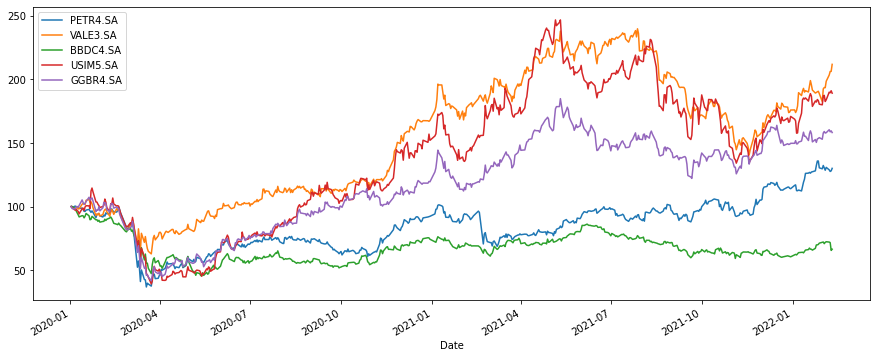

In [35]:
(meusdados / meusdados.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

### Calculando o Retorno de uma Carteira 

In [36]:
retorno = (meusdados / meusdados.shift(1)) - 1
retorno.head()

,PETR4.SA,VALE3.SA,BBDC4.SA,USIM5.SA,GGBR4.SA
Date,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.008143,-0.007362,0.000460,-0.010309,-0.016378
2020-01-06,0.011823,-0.005934,-0.017862,-0.018750,-0.002449
2020-01-07,-0.003895,0.007275,-0.017373,0.009554,0.015710
2020-01-08,-0.006191,0.000185,-0.015469,-0.012618,0.003866


In [37]:
weights = np.array([0.20, 0.20, 0.20, 0.20, 0.20])  # Pesos do Portfolio

In [38]:
retorno_anual = retorno.mean() * 250
retorno_anual

PETR4.SA    0.289859
VALE3.SA    0.461803
BBDC4.SA   -0.087535
USIM5.SA    0.497420
GGBR4.SA    0.357510
dtype: float64

In [39]:
np.dot(retorno_anual, weights)

0.30381155618802064

In [43]:
pfolio_1 = str(round(np.dot(retorno_anual, weights), 3) * 100) + ' %'
print (pfolio_1)

30.4 %


## Comparando com o Mercado

In [50]:

_ind_tickers = ['^BVSP']
ind_data = pd.DataFrame()

for t in _ind_tickers:
    ind_data[t] = wb.DataReader(t, data_source='yahoo', start='2020-1-1')['Adj Close']

In [51]:
ind_data.head()

,^BVSP
Date,
2020-01-02,118573
2020-01-03,117707
2020-01-06,116878
2020-01-07,116662
2020-01-08,116247


In [52]:
ind_data.tail()

,^BVSP
Date,
2022-02-04,112330
2022-02-07,111996
2022-02-08,112234
2022-02-09,112461
2022-02-10,113359


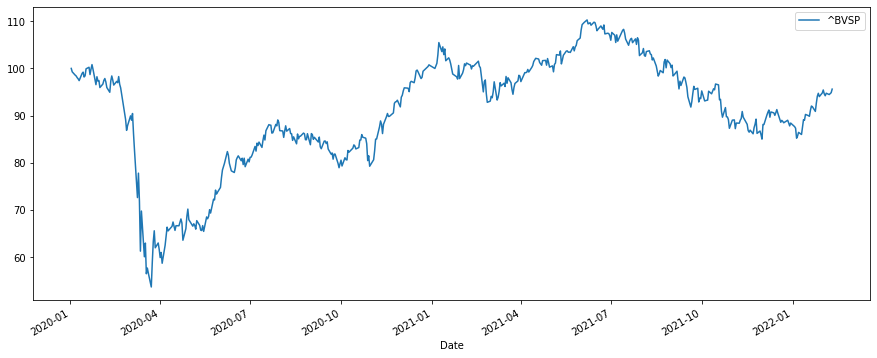

In [53]:
(ind_data / ind_data.iloc[0] * 100).plot(figsize=(15, 6));
plt.show()

In [54]:
ind_returns = (ind_data / ind_data.shift(1)) - 1

annual_ind_returns = ind_returns.mean() * 250
annual_ind_returns

^BVSP    0.037259
dtype: float64

In [55]:
tickers = ['PETR4.SA', 'VALE3.SA', '^BVSP']

data_2 = pd.DataFrame()

for t in tickers:
    data_2[t] = wb.DataReader(t, data_source='yahoo', start='2020-1-1')['Adj Close']    

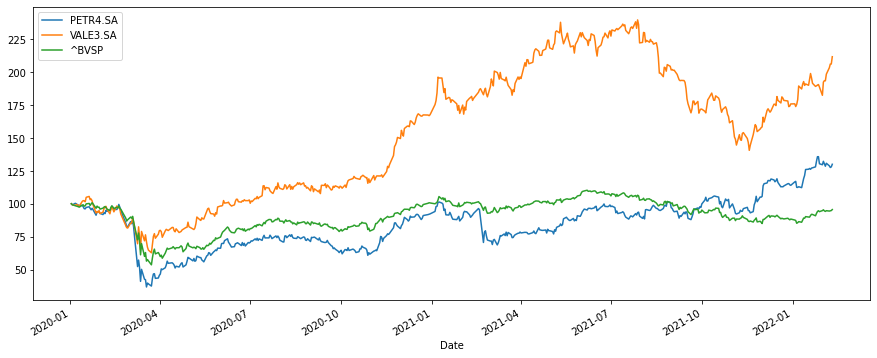

In [56]:
(data_2 / data_2.iloc[0] * 100).plot(figsize=(15, 6));
plt.show()